# Feature Engineering

In [1]:
import logging
import os

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words("portuguese")

RANDOM_SEED = 19730115
NUMBER_OF_WORDS = 50
rng = np.random.RandomState(RANDOM_SEED)

logging.basicConfig(format="%(asctime)s - %(message)s", level=logging.INFO)
# 1591632
logging.info("Required packages installed.")


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gomesluiz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2022-11-21 20:01:38,176 - Required packages installed.


In [2]:
def load_dataset(path, stratify=False):
    """Get the data from csv file

    Args:
        path(str): the file complete path. 

    Returns:
        dataframe: A pandas dataframe.
    """
    dataset = pd.read_csv(path)

    if stratify:
        dataset = dataset.groupby('polarity', group_keys=False).apply(
            lambda x: x.sample(frac=0.4))
        dataset.reset_index(drop=True, inplace=True)

    return dataset


In [3]:
# Load the reviews datasets.
logging.info("Load the reviews datasets.")
reviews_train_dataset = load_dataset(
    "../data/processed/buscape_reviews_train_dataset.csv", True)
reviews_test_dataset = load_dataset(
    "../data/processed/buscape_reviews_test_dataset.csv", True)


2022-11-21 20:02:09,689 - Load the reviews datasets.


In [4]:
reviews_train_dataset.head()


,original_index,review_text,review_text_cleaned,review_text_cleaned_len,review_text_cleaned_no_stopwords,review_text_cleaned_len_no_stopwords,polarity
0,3_391361,a samsung poderia imitar o midea em design mas...,a samsung poderia imitar o midea em design mas...,80,samsung poderia imitar midea design manter con...,46,-1
1,1_465330,A roupa sai manchada de sabão em pó. Já rasgou...,a roupa sai manchada de sabão em pó já rasgou ...,39,roupa sai manchada sabão pó rasgou fronha toal...,23,-1
2,1_446986,Esta guitarra NÃO é compatível com Nintendo Wi...,esta guitarra não é compatível com nintendo wi...,30,guitarra compatível nintendo wii site reclamea...,16,-1
3,2_472925,Depois de 3 anos de uso leve (duas pessoas em ...,depois de anos de uso leve duas pessoas em ca...,64,anos uso leve duas pessoas casa rolamentos que...,36,-1
4,0_40389,Nunca ouvi falar desse jogo a nao ser umas ima...,nunca ouvi falar desse jogo a nao ser umas ima...,23,nunca ouvi falar desse jogo nao umas imagens i...,15,-1


<AxesSubplot: title={'center': 'Polarity Distribution in Train'}>

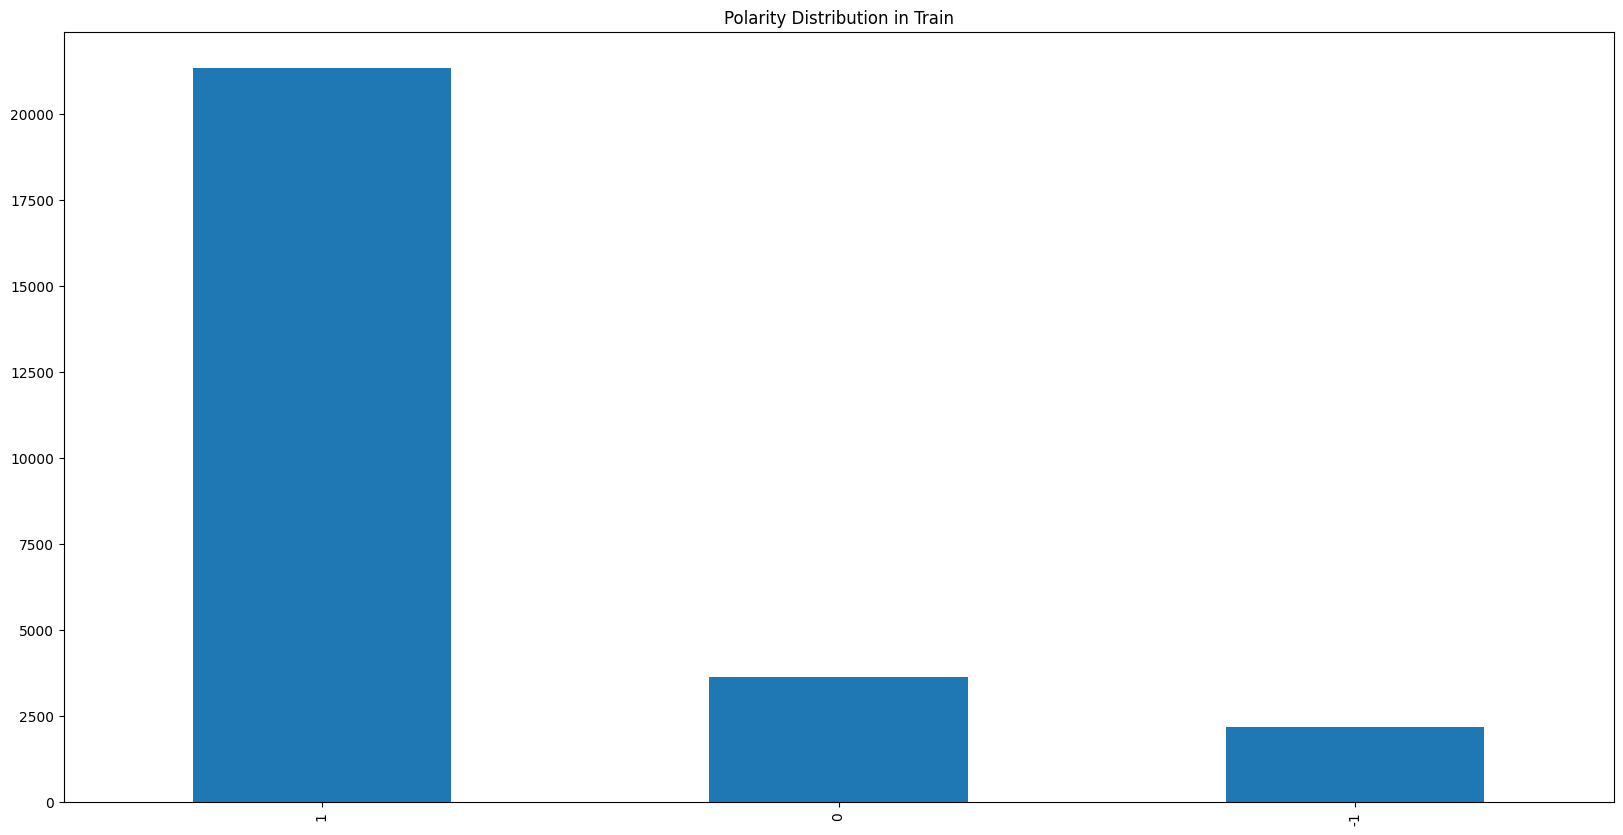

In [5]:
plt.figure(figsize=(20, 10))
plt.title('Polarity Distribution in Train')
reviews_train_dataset['polarity'].value_counts().plot(kind='bar')


In [6]:
reviews_test_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6785 entries, 0 to 6784
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   original_index                        6785 non-null   object
 1   review_text                           6785 non-null   object
 2   review_text_cleaned                   6785 non-null   object
 3   review_text_cleaned_len               6785 non-null   int64 
 4   review_text_cleaned_no_stopwords      6785 non-null   object
 5   review_text_cleaned_len_no_stopwords  6785 non-null   int64 
 6   polarity                              6785 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 371.2+ KB


In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Polarity Distribution in Test')
reviews_test_dataset['polarity'].value_counts().plot(kind='bar')


### Counter Vectorizer

In [ ]:
cv = CountVectorizer(stop_words=stopwords, max_features=NUMBER_OF_WORDS)
reviews_train_cv = cv.fit_transform(
    reviews_train_dataset['review_text_cleaned_no_stopwords'])
reviews_train_dtm_cv = pd.DataFrame(
    reviews_train_cv.toarray(), columns=cv.get_feature_names_out())
reviews_train_dtm_cv.index = reviews_train_dataset.index
reviews_train_processed_cv = pd.concat([reviews_train_dataset[[
                                       'original_index']], reviews_train_dtm_cv, reviews_train_dataset[['polarity']]], axis=1)
logging.info(
    f"The counter vectorizer train matrix has {reviews_train_processed_cv.shape[0]} rows and {reviews_train_processed_cv.shape[1]} columns")

reviews_test_cv = cv.transform(
    reviews_test_dataset['review_text_cleaned_no_stopwords'])
reviews_test_dtm_cv = pd.DataFrame(
    reviews_test_cv.toarray(), columns=cv.get_feature_names_out())
reviews_test_dtm_cv.index = reviews_test_dataset.index
reviews_test_processed_cv = pd.concat([reviews_test_dataset[[
                                      'original_index']], reviews_test_dtm_cv, reviews_test_dataset[['polarity']]], axis=1)
logging.info(
    f"The counter vectorizer test matrix has {reviews_test_processed_cv.shape[0]} rows and {reviews_test_processed_cv.shape[1]} columns")


In [ ]:
reviews_train_processed_cv.head(5)


In [ ]:
reviews_test_processed_cv.head(5)


In [ ]:
reviews_train_processed_cv.to_pickle(
    f'../data/processed/buscape_reviews_train_dataset_cv_s{NUMBER_OF_WORDS}.pkl')
reviews_test_processed_cv.to_pickle(
    f'../data/processed/buscape_reviews_test_dataset_cv_s{NUMBER_OF_WORDS}.pkl')


### TF-IDF Vectorizer

In [ ]:

tv = TfidfVectorizer(stop_words=stopwords, max_features=50)
reviews_train_tv = tv.fit_transform(reviews_train_dataset['review_text'])
reviews_train_dtm_tv = pd.DataFrame(
    reviews_train_tv.toarray(), columns=tv.get_feature_names_out())
reviews_train_dtm_tv.index = reviews_train_dataset.index
reviews_train_processed_tv = pd.concat([reviews_train_dataset[[
                                       'original_index']], reviews_train_dtm_tv, reviews_train_dataset[['polarity']]], axis=1)
logging.info(
    f"The tf-idf vectorizer train matrix has {reviews_train_processed_tv.shape[0]} rows and {reviews_train_processed_tv.shape[1]} columns")

reviews_test_tv = tv.transform(reviews_test_dataset['review_text'])
reviews_test_dtm_tv = pd.DataFrame(
    reviews_test_tv.toarray(), columns=tv.get_feature_names_out())
reviews_test_dtm_tv.index = reviews_test_dataset.index
reviews_test_processed_tv = pd.concat([reviews_test_dataset[[
                                      'original_index']], reviews_test_dtm_tv, reviews_test_dataset[['polarity']]], axis=1)
logging.info(
    f"The tf-idf vectorizer test matrix has {reviews_test_processed_tv.shape[0]} rows and {reviews_test_processed_tv.shape[1]} columns")


In [ ]:
reviews_train_processed_tv.head(5)


In [ ]:
reviews_train_processed_tv.to_pickle(
    f'../data/processed/buscape_reviews_train_dataset_tv_s{NUMBER_OF_WORDS}.pkl')
reviews_test_processed_tv.to_pickle(
    f'../data/processed/buscape_reviews_test_dataset_tv_s{NUMBER_OF_WORDS}.pkl')


### Embedding Vectorizer

In [ ]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile


EMBEDDING_NAMES = [
    ["word2vec", "cbow_s50"],
    ["word2vec", "skip_s50"],
    ["fasttext", "cbow_s50"],
    ["fasttext", "skip_s50"],
    ["glove", "glove_s50"],
    ["wang2vec", "cbow_s50"],
    ["wang2vec", "skip_s50"],
]


def download_extract(model, architecture):
    url = f"http://143.107.183.175:22980/download.php?file=embeddings/{model}/{architecture}.zip"
    out_folder_path = os.path.join("../data/embeddings/", model)
    out_file_path = os.path.join(out_folder_path, architecture)
    logging.info(f"Downloading: {model}_{architecture}")
    if not os.path.exists(out_file_path):
        with urlopen(url) as response:
            with ZipFile(BytesIO(response.read())) as in_file_zip:
                in_file_zip.extractall(out_folder_path)


for model, architecture in EMBEDDING_NAMES:
    download_extract(model, architecture)


In [ ]:
# Load the pre-trainned fast text embedding.
logging.info("Load fast text embeddings.")
fasttext_cbow_s50 = KeyedVectors.load_word2vec_format(
    "../data/embeddings/fasttext/cbow_s50.txt"
)
fasttext_skip_s50 = KeyedVectors.load_word2vec_format(
    "../data/embeddings/fasttext/skip_s50.txt"
)


In [ ]:
# Load the pre-trainned glove embedding.
logging.info("Load glove embeddings.")
glove_s50 = KeyedVectors.load_word2vec_format("../data/embeddings/glove/glove_s50.txt")

In [ ]:
# Load the pre-trainned wang2vec embedding.
logging.info("Load wang2vec embeddings.")
wang2vec_cbow_s50 = KeyedVectors.load_word2vec_format(
    "../data/embeddings/wang2vec/cbow_s50.txt"
)
wang2vec_skip_s50 = KeyedVectors.load_word2vec_format(
    "../data/embeddings/wang2vec/skip_s50.txt"
)

: 

In [ ]:
# Load the pre-trainned word2vec embedding.
logging.info("Load word2vec embeddings.")
word2vec_cbow_s50 = KeyedVectors.load_word2vec_format(
    '../data/embeedings/word2vec_cbow_s50/cbow_s50.txt')
word2vec_skip_s50 = KeyedVectors.load_word2vec_format(
    '../data/embeedings/word2vec_skip_s50/skip_s50.txt')


In [ ]:
# def text_to_bert(text)
def text_to_embedding(text, model, vectorizer=None, vocab=None, size=50):
    if not vectorizer:
        raise Exception("The vectorizer parameter must not be None")

    transformed = vectorizer.transform(text)
    vectorized = pd.DataFrame(transformed.toarray(
    ), columns=vectorizer.get_feature_names_out())

    embeedings = pd.DataFrame()
    for i in range(vectorized.shape[0]):
        sentence = np.zeros(size)
        for word in vocab[vectorized.iloc[i, :] > 0]:
            if model.get_index(word, default=-1) != -1:
                sentence = sentence + model.get_vector(word)
            else:
                print("Out of Vocabulary")

        embeedings = pd.concat([embeedings, pd.DataFrame([sentence])])

    return embeedings


In [ ]:
embedding_models = [fasttext_cbow_s50, fasttext_skip_s50, glove_s50,
                    wang2vec_cbow_s50, wang2vec_skip_s50, word2vec_cbow_s50, word2vec_skip_s50]

for name, model in zip(EMBEDDING_NAMES, embedding_models):
    reviews_train_dtm = text_to_embedding(
        reviews_train_dataset['review_text'], model, tv, reviews_test_processed_tv.columns[1:-1], 50)
    reviews_train_processed = pd.concat([reviews_train_dataset.reset_index()[['original_index']], reviews_train_dtm.reset_index(
        drop=True), reviews_train_dataset.reset_index()[['polarity']]], axis=1, ignore_index=True)
    reviews_train_processed.to_pickle(
        f"../data/processed/buscape_reviews_train_dataset_{name}.pkl")
    print(
        f"The {name} vectorizer train dataframe has {reviews_train_processed.shape[0]} rows and {reviews_train_processed.shape[1]} columns")

    reviews_test_dtm = text_to_embedding(
        reviews_test_dataset['review_text'], model, tv, reviews_test_processed_tv.columns[1:-1], 50)
    reviews_test_processed = pd.concat([reviews_test_dataset.reset_index()[['original_index']], reviews_test_dtm.reset_index(
        drop=True), reviews_test_dataset.reset_index()[['polarity']]], axis=1, ignore_index=True)
    reviews_test_processed.to_pickle(
        f"../data/processed/buscape_reviews_test_dataset_{name}.pkl")
    print(
        f"The {name} vectorizer test dataframe has {reviews_test_processed.shape[0]} rows and {reviews_test_processed.shape[1]} columns")


In [ ]:
import torch

from transformers import AutoTokenizer
from transformers import AutoModel

model = AutoModel.from_pretrained("neuralmind/bert-base-portuguese-cased")
logging.info(f"Transformers model class model: {type(model)}")
tokenizer = AutoTokenizer.from_pretrained(
    "neuralmind/bert-base-portuguese-cased", do_lower_case=True
)
logging.info(f"Transformers tokenizer class: {type(tokenizer)}")


def encode_sentences(sentences):
    """Encode a text sentence using BERT tokenizer.

    Args:
        sentence (str): sentence to tokenizer.

    Returns:

    """

    inputs_ids, attn_mask = [], []

    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.

    for sentence in sentences:
        sentence_tokenized = tokenizer.encode_plus(
            text=sentence,
            add_special_tokens=True,
            max_length=10,
            padding="max_length",
            return_attention_mask=True,
            return_tensors="pt",
        )

        input_ids.append(sentence_tokenized["input_ids"])
        attn_mask.append(sentence_tokenized["attention_mask"])

    return torch.tensor(input_ids, dtype=torch.long), torch.tensor(attn_mask, dtype=torch.long)


input_ids, attn_masks = encode_sentences(reviews_train_dataset['review_text'])
with torch.no_grad():
    outputs = model(input_ids, attn_masks)


In [ ]:
def build_tensors(descriptions, tokenizer, max_tokens=128):
    # tokenization.
    sentences = descriptions['review_text_cleaned'].apply(
        (lambda s: ' '.join(s.split()[:max_tokens])))
    tokenized = sentences.apply(
        (lambda s: tokenizer.encode(s, add_special_tokens=True, truncation=True)))

    # padding
    max_len = max_tokens
    for i in tokenized.values:
        if len(i) > max_len:
            max_len = len(i)

    padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

    # masking
    attention_mask = np.where(padded != 0, 1, 0)

    # model#1
    input_ids = torch.tensor(padded)
    attention_mask = torch.tensor(attention_mask)

    return (input_ids, attention_mask)


def extract_features(dataset, model, tokenizer):
    
    bug_ids = dataset['original_index']

    input_ids, attention_mask = build_tensors(dataset, tokenizer)
    with torch.no_grad():
        last_hidden_states = model(input_ids, attention_mask=attention_mask)

    features = last_hidden_states[0][:, 0, :].numpy()
    
    labels  = dataset['polarity']
    
    return (features, labels, bug_ids)


In [ ]:
extract_features(reviews_test_dataset, model, tokenizer)
